In [1]:
import warnings
warnings.simplefilter(action = 'ignore')
import gym
import random
from IPython.display import clear_output

In [3]:
env = gym.make('MountainCar-v0')
env.reset()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


array([-0.40199587,  0.        ], dtype=float32)

In [4]:
print('State space:', env.observation_space)
print('Action space:', env.action_space)

State space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space: Discrete(3)


In [5]:
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1

    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1,
                          size = (num_states[0], num_states[1],
                                  env.action_space.n))

    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []

    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes

    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()

        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)

        while done != True:
            # Render environment for last five episodes
            if i >= (episodes - 20):
                env.render()

            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]])
            else:
                action = np.random.randint(0, env.action_space.n)

            # Get next state and reward
            state2, reward, done, info = env.step(action)

            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)

            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward

            # Adjust Q value for current state
            else:
                delta = learning*(reward +
                                 discount*np.max(Q[state2_adj[0],
                                                   state2_adj[1]]) -
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta

            # Update variables
            tot_reward += reward
            state_adj = state2_adj

        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction

        # Track rewards
        reward_list.append(tot_reward)

        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []

     #Finally, the function returns the list of average rewards per episode.


    return ave_reward_list

In [7]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Average Reward vs Episodes')

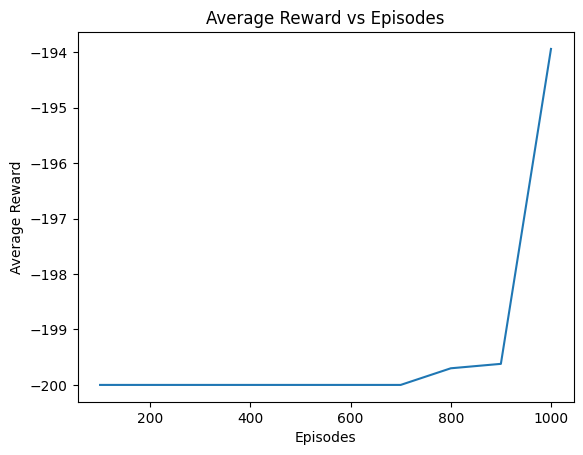

In [10]:
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 1000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')



Text(0.5, 1.0, 'Average Reward vs Episodes')

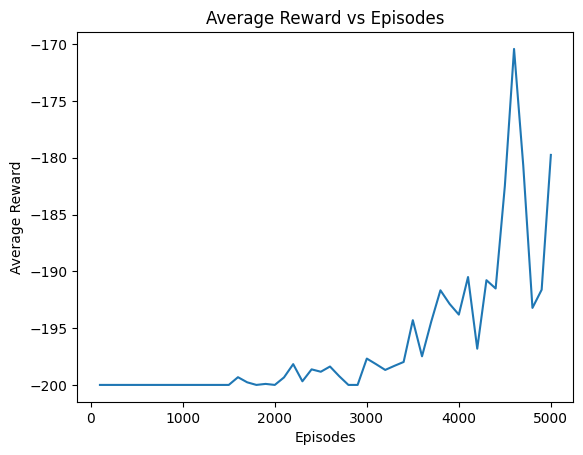

In [12]:
rewards = QLearning(env, 0.2, 0.9, 0.5, 0, 5000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

In [ ]:
rewards = QLearning(env, 0.2, 0.8, 0.8, 0, 10000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

In [ ]:
rewards = QLearning(env, 0.2, 0.1, 0.9, 0, 5000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')